<a href="https://colab.research.google.com/github/Yashmitha22/ML_projects/blob/main/GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import the necessary modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
from matplotlib.patches import Ellipse


In [11]:
#Generate the synthetic data
X,y_true = make_blobs(n_samples=500,centers=6,cluster_std=0.70,random_state=42)

In [12]:
#Apply the transformation to strech the data
transformation = [[0.6,-0.6], [-0.4,0.8]]
X_aniso = np.dot(X,transformation)

In [13]:
#Create and fit the GMM
gmm = GaussianMixture(n_components=6,random_state=42)

In [14]:
#Fit the model to the data and predict the cluster for each point
y_gmm = gmm.fit(X_aniso).predict(X_aniso)

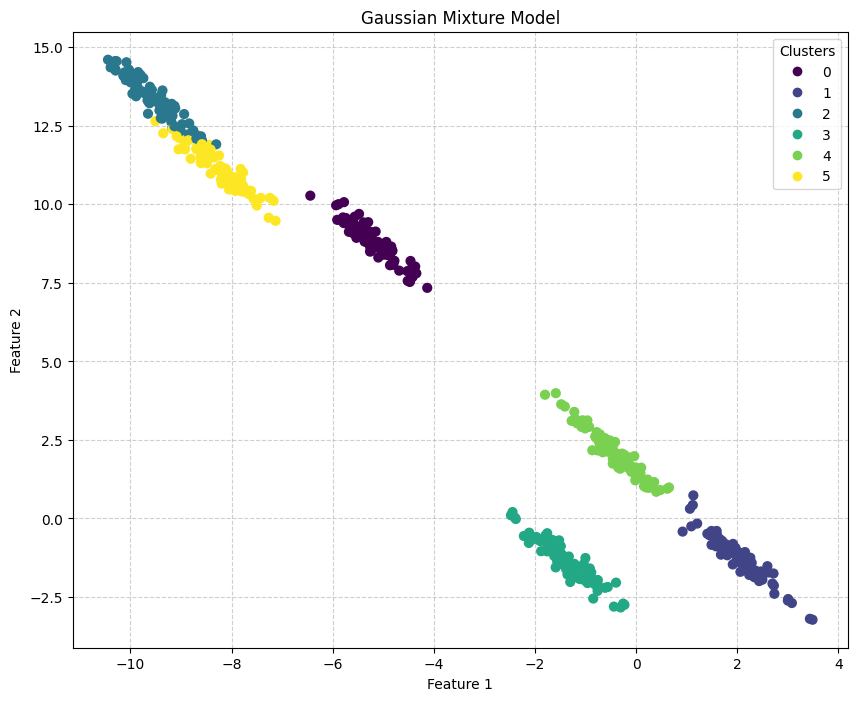

In [15]:
#Visualize the results
plt.figure(figsize=(10,8))
ax = plt.gca()

#plot teh data point colored by GMM
scatter = ax.scatter(X_aniso[:, 0],X_aniso[:, 1], c=y_gmm, s=40, cmap='viridis',zorder=2)

#Add a legend
plt.legend(handles = scatter.legend_elements()[0],labels=set(y_gmm),title="Clusters")

#function to draw the ellipse
def draw_ellipse(position,covariance,ax=None,**kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()

    #convert covariance to principal axes
    if covariance.shape == (2,2):
      U,s,Vt = np.linalg.svd(covariance)
      angle = np.degrees(np.arctan2(U[1,0],U[0,0]))
      width,height = 2*np.sqrt(s)
    else:
      angle = 0
      width,height = 2*np.sqrt(covariance)

      #Draw the ellipse
      for nsig in range(1,4):
        ax.add_patch(Ellipse(position,(nsig*width,nsig*height),angle,**kwargs))

#Draw an ellipse for each of the 4 learned componenets
for pos,covar,w in zip(gmm.means_,gmm.covariances_,gmm.weights_):
  draw_ellipse(pos,covar,alpha=w*0.2, facecolor='yellow',edgecolor='black')

plt.title("Gaussian Mixture Model")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, linestyle='--',alpha=0.6)
plt.show()

